In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
automobile_df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv')
automobile_df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [118]:
# pd.plotting.scatter_matrix(automobile_df, figsize=[8,8], s=150, marker='D')

In [11]:
?sb.heatmap

In [119]:
# sb.heatmap(automobile_df)

In [13]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
origin    392 non-null object
size      392 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.5+ KB


# Learning Data Clustering(UNSUPERVISED LEARNING)

## Iris Dataset

In [3]:
iris_df = pd.read_csv('IRIS.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [13]:
X = np.array(iris_df.drop('species', axis=1))
y = np.array(iris_df.species)

In [15]:
type(X)

numpy.ndarray

In [16]:
type(y)

numpy.ndarray

In [22]:
# from sklearn import model_selection

In [23]:
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.33, random_state=12)

In [24]:
from sklearn import cluster

In [30]:
inertia = []
ks = range(1,6)
for n in range(1,6):
    kmeans = cluster.KMeans(n_clusters = n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

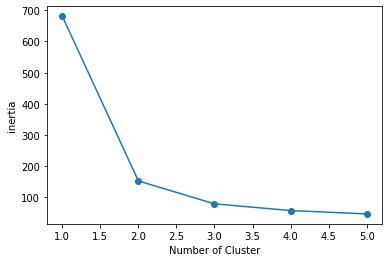

In [31]:
plt.plot(ks, inertia, 'o-')
plt.xlabel('Number of Cluster')
plt.ylabel('inertia')
plt.show()

In [33]:
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)

In [34]:
iris_cluster_df = pd.DataFrame({'labels':labels, 'species':y})
iris_cluster_df.head()

,labels,species
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa


In [36]:
iris_cluster = pd.crosstab(iris_cluster_df['labels'], iris_cluster_df['species'])
iris_cluster

species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


In [38]:
iris_cluster.columns = ['setosa', 'versicolor', 'virginica']

In [39]:
iris_cluster

,setosa,versicolor,virginica
labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Wine Dataset

In [40]:
wine_df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv')
wine_df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
class_label             178 non-null int64
class_name              178 non-null object
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_of_ash       178 non-null float64
magnesium               178 non-null int64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
od280                   178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3), object(1)
memory usage: 20.9+ KB


In [59]:
wine_X = np.array(wine_df.drop('class_name', axis=1))
wine_y = wine_df.class_name

In [60]:
wine_X[:1]

array([[1.000e+00, 1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02,
        2.800e+00, 3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00,
        3.920e+00, 1.065e+03]])

In [61]:
wine_y[:5]

0    Barolo
1    Barolo
2    Barolo
3    Barolo
4    Barolo
Name: class_name, dtype: object

In [68]:
wine_inertia = []
for n in ks:
    wine_kmeans = cluster.KMeans(n_clusters = n)
    labels = wine_kmeans.fit_predict(wine_X)
    wine_inertia.append(wine_kmeans.inertia_)

In [69]:
wine_inertia

[17592402.70373319,
 4543801.220149009,
 2370742.3045900567,
 1333194.0634393771,
 916424.194313911]

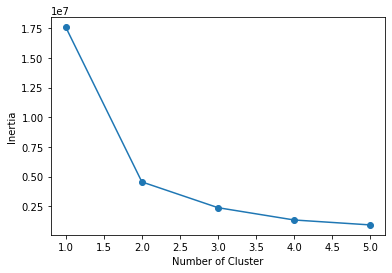

In [70]:
plt.figure()
plt.plot(ks, wine_inertia, '-o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

In [71]:
wine_kmeans = cluster.KMeans(n_clusters=3)
labels = wine_kmeans.fit_predict(wine_X)

In [75]:
wine_cluster_df = pd.DataFrame({'labels':labels, 'varieties':wine_y})
wine_cluster_df.head(20)

,labels,varieties
0,1,Barolo
1,1,Barolo
2,1,Barolo
3,1,Barolo
4,2,Barolo
5,1,Barolo
6,1,Barolo
7,1,Barolo
8,1,Barolo
9,1,Barolo


In [76]:
wine_cluster = pd.crosstab(wine_cluster_df['labels'], wine_cluster_df['varieties'])
wine_cluster

varieties,Barbera,Barolo,Grignolino
labels,,,
0,19,0,50
1,0,46,1
2,29,13,20


In [77]:
wine_df.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


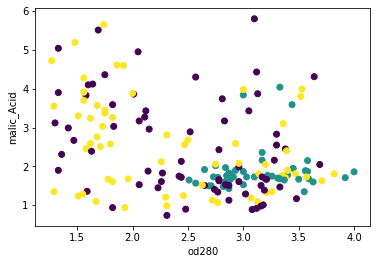

In [86]:
plt.figure()
plt.scatter(wine_df.od280, wine_df.malic_acid, c=labels)
plt.xlabel('od280')
plt.ylabel('malic_Acid')
plt.show()

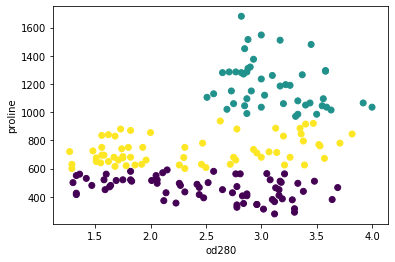

In [84]:
plt.figure()
plt.scatter(wine_df.od280, wine_df.proline, c=labels)
plt.xlabel('od280')
plt.ylabel('proline')
plt.show()

In [88]:
from sklearn import preprocessing, pipeline

In [89]:
wine_scaler = preprocessing.StandardScaler()
wine_kmeans = cluster.KMeans(n_clusters=3)
wine_pipeline = pipeline.make_pipeline(wine_scaler, wine_kmeans)

In [90]:
wine_pipeline.fit(wine_X)
labels = wine_pipeline.predict(wine_X)

In [91]:
wine_cluster_by_scaler_df = pd.DataFrame({'labels':labels, 'varieties':wine_y})
wine_cluster_by_scaler_df.head()

,labels,varieties
0,0,Barolo
1,0,Barolo
2,0,Barolo
3,0,Barolo
4,0,Barolo


In [92]:
wine_cluster_scaler = pd.crosstab(wine_cluster_by_scaler_df['labels'], wine_cluster_by_scaler_df['varieties'])
wine_cluster_scaler

varieties,Barbera,Barolo,Grignolino
labels,,,
0,0,59,2
1,0,0,68
2,48,0,1


## Company Stock Movements 2010-2015

In [93]:
movements_df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv')
movements_df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [94]:
movements_df['Comapany'] = movements_df['Unnamed: 0']
movements_df.drop('Unnamed: 0', axis=1, inplace = True)

In [95]:
movements_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29,Comapany
0,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981,Apple
1,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000,AIG
2,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021,Amazon
3,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001,American express
4,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998,Boeing


In [98]:
movements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, 2010-01-04 to Comapany
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [99]:
movements_x = np.array(movements_df.drop('Comapany', axis=1))
movements_y = np.array(movements_df.Comapany)

In [110]:
movement_inertia = []
ks = range(1,15)
for n in ks:
    movement_kmeans = cluster.KMeans(n_clusters = n)
    labels = movement_kmeans.fit_predict(movements_x)
    movement_inertia.append(movement_kmeans.inertia_)

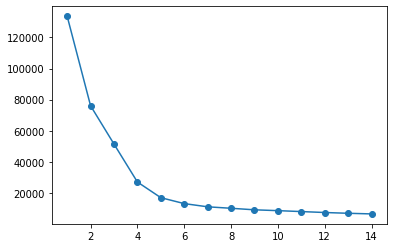

In [111]:
plt.plot(ks, movement_inertia, 'o-')
plt.show()

In [113]:
movements_normalize = preprocessing.Normalizer()
movements_kmeans = cluster.KMeans(n_clusters=10)
movement_pipeline = pipeline.make_pipeline(movements_normalize, movements_kmeans)
movement_pipeline.fit(movements_x)
movement_labels = movement_pipeline.predict(movements_x)

In [114]:
movements_cluster = pd.DataFrame({'label':movement_labels, 'company':movements_y})
movements_cluster.head()

,label,company
0,6,Apple
1,4,AIG
2,7,Amazon
3,4,American express
4,3,Boeing


In [115]:
movements = pd.crosstab(movements_cluster.label, movements_cluster.company)
movements

company,3M,AIG,Amazon,American express,Apple,Bank of America,Boeing,British American Tobacco,Canon,Caterpillar,...,Texas instruments,Total,Toyota,Unilever,Valero Energy,Wal-Mart,Walgreen,Wells Fargo,Xerox,Yahoo
label,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [117]:
movements_cluster.sort_values('label').head()

,label,company
41,0,Philip Morris
23,1,IBM
20,1,Home Depot
28,1,Coca Cola
32,1,3M


In [130]:
# from zipfile import ZipFile

In [129]:
# file_name = "https://assets.datacamp.com/production/repositories/655/datasets/bb87f0bee2ac131042a01307f7d7e3d4a38d21ec/Grains.zip"
# with ZipFile(file_name, 'r') as zip:
#     zip.printdir()
#     zip.extractall()
#     print('Done!') 

## Eurovision-2016


In [131]:
eurovision_2016 = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv')
eurovision_2016.head(10)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
5,Albania,Italy,4,10,3,7,2,3,2,8.0,10.0
6,Albania,Israel,10,2,18,4,12,8,17,3.0,NaN
7,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0
8,Albania,Sweden,16,8,15,6,15,11,8,NaN,3.0
9,Albania,Germany,18,17,20,11,17,18,15,NaN,NaN


In [132]:
import scipy
from scipy.cluster import hierarchy

In [139]:
eurovision_2016.tail(10)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
1056,United Kingdom,Lithuania,7,8,13,19,3,7,1,4.0,12.0
1057,United Kingdom,Croatia,21,12,10,5,6,10,25,1.0,NaN
1058,United Kingdom,Russia,20,16,11,13,2,13,4,NaN,7.0
1059,United Kingdom,Spain,17,18,22,16,21,21,7,NaN,4.0
1060,United Kingdom,Latvia,22,9,4,12,20,15,8,NaN,3.0
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,NaN,NaN
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,NaN
1064,United Kingdom,Austria,23,15,12,18,13,17,13,NaN,NaN
1065,United Kingdom,Armenia,15,22,7,24,18,20,18,NaN,NaN


In [143]:
eurovision_2016.fillna(eurovision_2016.mean(), inplace=True)

In [144]:
eurovision_2016.tail(10)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
1056,United Kingdom,Lithuania,7,8,13,19,3,7,1,4.0,12.0
1057,United Kingdom,Croatia,21,12,10,5,6,10,25,1.0,5.8
1058,United Kingdom,Russia,20,16,11,13,2,13,4,5.8,7.0
1059,United Kingdom,Spain,17,18,22,16,21,21,7,5.8,4.0
1060,United Kingdom,Latvia,22,9,4,12,20,15,8,5.8,3.0
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,5.8,5.8
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,5.8
1064,United Kingdom,Austria,23,15,12,18,13,17,13,5.8,5.8
1065,United Kingdom,Armenia,15,22,7,24,18,20,18,5.8,5.8


In [145]:
print(len(eurovision_2016['From country'].unique()))
print(len(eurovision_2016['To country'].unique()))

42
26


In [146]:
x = eurovision_2016.drop(['From country', 'To country'], axis =1)
y = eurovision_2016['From country']

In [169]:
len(np.array(x))

1066

In [163]:
y_un = y.unique()

In [164]:
eurovision_2016_linkage = hierarchy.linkage(np.array(x), method='complete')


In [165]:
plt.figure(figsize=(50,5))
hierarchy.dendrogram(eurovision_2016_linkage, labels=np.array(y_un), leaf_rotation=90, leaf_font_size = 6)
plt.show()

IndexError: index -355 is out of bounds for axis 0 with size 42

<Figure size 3600x360 with 0 Axes>

In [ ]:
# x.info()

In [ ]:
hierarchyrarchy.fcluster()